<a href="https://colab.research.google.com/github/youngsu1jeong/202007_bootcamp1/blob/master/gh_02_ROC_%E1%84%83%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AB%E1%84%89%E1%85%AE_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC, 다중변수

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score


%config InlineBackend.figure_format = 'retina'


In [9]:
def conf_matrix(y_test, y_pred):
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

def draw_roc(y_test, score):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr, tpr, _ = roc_curve(y_test, score)
  roc_auc = roc_auc_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, label='AUC = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
def draw_pr(y_test, score):
  pre = dict()
  rcl = dict()
  ap = dict()
  pre, rcl, _ = precision_recall_curve(y_test, score)
  ap = average_precision_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(rcl, pre, label='AP = %0.4f)' % ap)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend(loc="lower right")

- ROC for positive [1]

In [10]:
score

NameError: ignored

[[3 2]
 [1 4]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



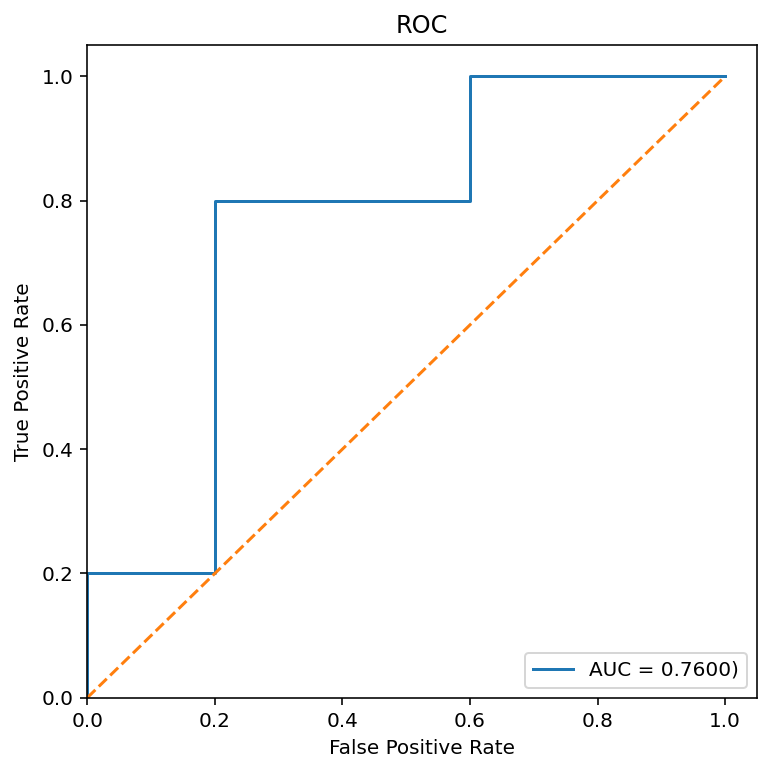

In [11]:
import numpy as np
score = np.linspace(1,0,10).round(1)

y_test = [1,0,1,1,1,0,0,1,0,0]

y_pred = [1,1,1,1,1,1,0,0,0,0]
draw_roc(y_test, score)
conf_matrix(y_test, y_pred)

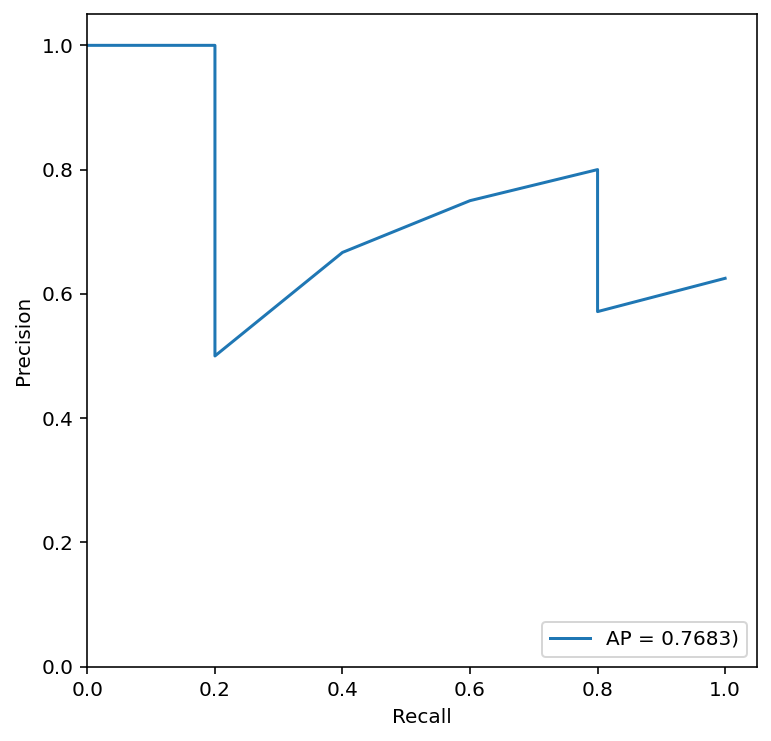

In [12]:
draw_pr(y_test, score)

- ROC for negative [0]

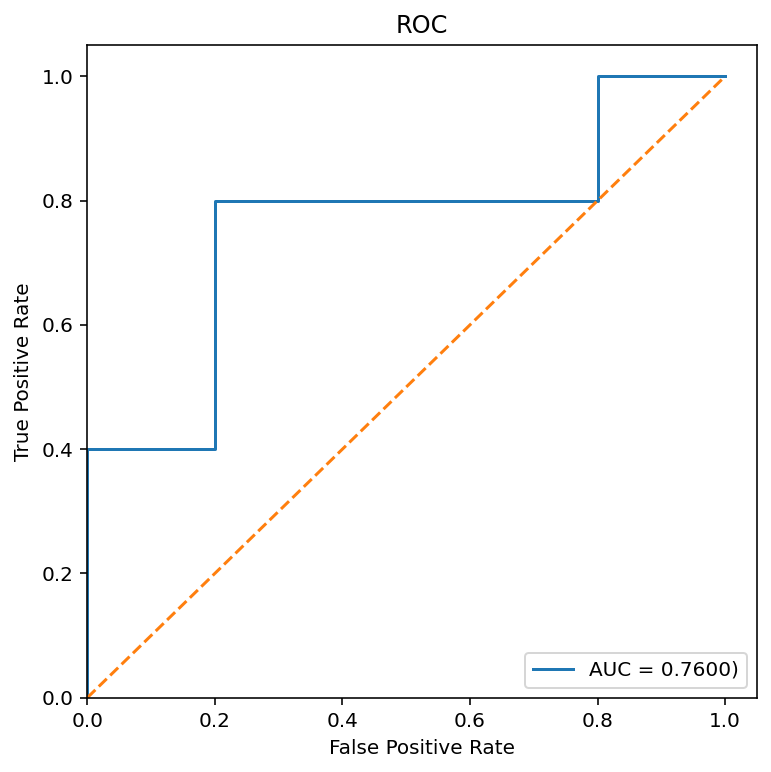

In [13]:
inverse_y_test = [0 if s else 1 for s in y_test]
inverse_score = score[::-1] # ::-1 <- 앞뒤 변환
# or probability of [0] rather that [1]
draw_roc(inverse_y_test, inverse_score)

- 붓 꽃을 이용한 3가지 분류에서 ROC를 각각 그리는 방법

In [23]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# Add noisy features to make the problem harder
n_samples, n_features = X.shape

In [26]:
n_samples, n_features

(150, 4)

In [28]:
y.shape

(150, 3)

In [29]:
y.shape[1]

3

In [38]:
# X2 = np.c_[X, np.random.randn(n_samples, 200 * n_features)]
noise = np.random.randn(n_samples, n_features)*1.2
X2 = X + noise

In [39]:
X[:3], X2[:3].round(1) # Noise  섞은거 비교

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]), array([[ 4.6,  3. ,  1.5,  0.5],
        [ 4.1,  3.3,  2.4, -0.3],
        [ 4.5,  5.3,  3.2,  1.2]]))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.5,
                                                    random_state=9)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=9)) # oneVsRestClassifier : ROC 는 2진 분류, 3개 이상 있을 경우, 원하는거 !하나랑 나머지!oneVsRestClassifier 로 2진 분류로 재계산.
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [47]:
y_score

array([[-2.61373157, -0.9998512 , -0.27008464],
       [-4.063527  , -0.99978067,  0.22766014],
       [-5.0129271 , -0.99968504,  0.91479502],
       [-3.8205941 , -1.00005724,  1.00695923],
       [ 0.65314521, -1.00012338, -2.00684015],
       [ 3.24965077, -1.00008008, -3.72199814],
       [ 0.18339441, -0.99984586, -2.15687543],
       [ 3.60822049, -1.00035513, -3.33721902],
       [-3.3733122 , -0.99992545,  0.24929591],
       [ 1.25027212, -1.00001883, -2.56836547],
       [-2.532602  , -1.00009958,  0.1611378 ],
       [-2.10874685, -0.9998262 , -0.91962312],
       [-0.97129561, -1.00027119, -0.46706562],
       [ 0.4544471 , -0.9998967 , -2.44028568],
       [ 3.43089053, -1.00026523, -3.66796653],
       [-1.03691629, -1.00009202, -0.76170829],
       [ 1.93938369, -1.00036042, -2.21027588],
       [-1.71391747, -0.99986877, -0.98027918],
       [-5.24690418, -0.99974284,  1.05329516],
       [ 5.24700112, -1.00033657, -4.47897591],
       [ 2.09870021, -1.00006619, -3.097

In [50]:
y_test[:10]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [51]:
fpr[0]

array([0.        , 0.        , 0.        , 0.02083333, 0.02083333,
       0.04166667, 0.04166667, 0.0625    , 0.0625    , 0.125     ,
       0.125     , 0.25      , 0.25      , 0.5       , 0.5       ,
       1.        ])

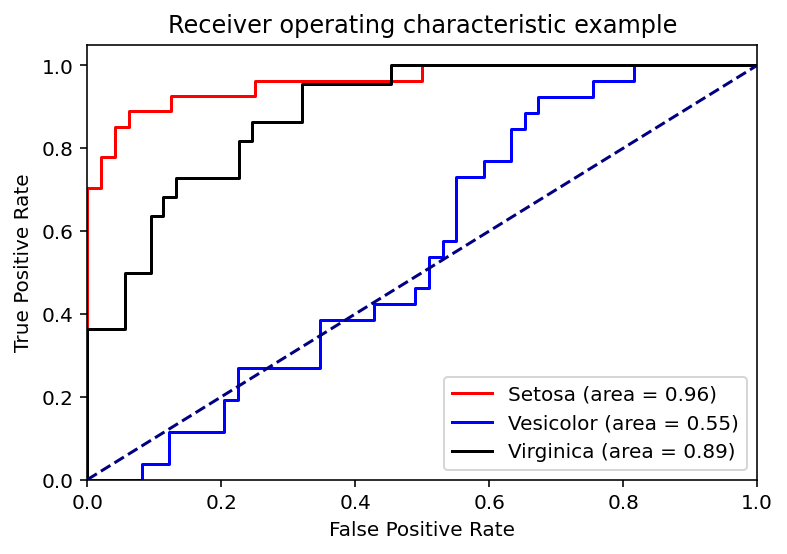

In [49]:
plt.plot(fpr[0], tpr[0], color='r',  # x축 : fpr[0] , y축 : tpr[0] -> [0] 찾기
         label='Setosa (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='b',
         label='Vesicolor (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='k',
         label='Virginica (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

- 같은 동작

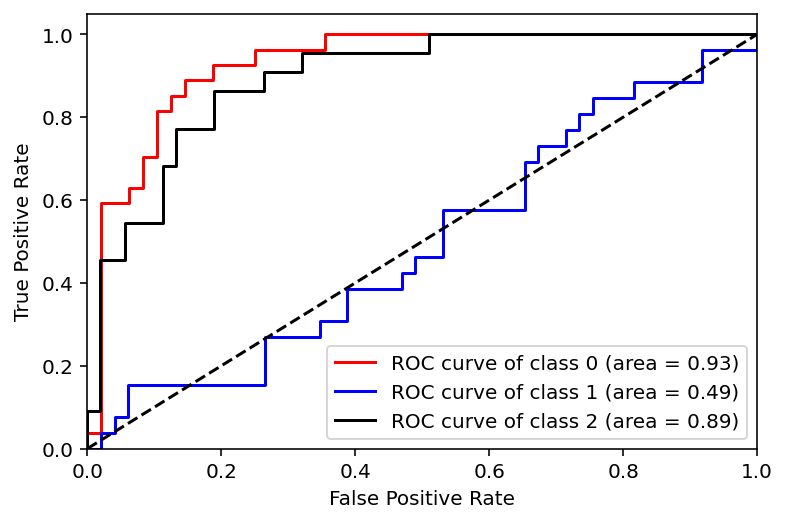

In [22]:
colors = cycle(['r', 'b', 'k'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()